# Práctica 1


## Datos

importación de las librerias utilizadas

In [80]:
import pandas as pd # Lectura de los datos
import numpy as np # funciones matemáticas
import matplotlib.pyplot as plt # Graficacion
import seaborn as sb # Histograma
from scipy import stats # Distribuciones
from scipy.stats import poisson
plt.style.use('ggplot') # Estilo de gráfica
%matplotlib inline

Lectura de datos

In [2]:
# Librerio pandas para leer el archivo csv
data = pd.read_csv('Practica de Seguridad Radioloogica.csv')

### Análisis estadístico de datos

In [3]:
# Este comando sirve para visualizar los primeros 5 datos de cualquier dataset
data.head()

,Serial number:,Unnamed: 1,Unnamed: 2,Lectura,Cuentas,Unnamed: 5,Lectura.1,Cuentas.1
0,Tubo GM:,NaN,NaN,NaN,NaN,NaN,1,323
1,Vop=820 v,NaN,NaN,NaN,NaN,NaN,2,324
2,NaN,NaN,NaN,NaN,NaN,NaN,3,302
3,NaN,NaN,NaN,NaN,NaN,NaN,4,331
4,NaN,NaN,NaN,NaN,NaN,NaN,5,287


In [4]:
# Seleccionamos solo las columnas que nos interesan
data_graf = data[['Lectura.1','Cuentas.1']]
data_graf.head()

,Lectura.1,Cuentas.1
0,1,323
1,2,324
2,3,302
3,4,331
4,5,287


## Histograma

Para el histograma debes escoger el numero de clases a graficar, suelo usar la regla de Sturges $$k = 1+3.3221\log(N)$$ Donde $k$ es el número de clases (barras) y $N$ es el número de datos. En estes caso particular

$$k = 1+3.3221\log(220) = 8.7 \approx 9$$ 

con esto puedes sacar el ancho de clase $$h = \frac{Rango}{k}$$ Asi ya puedes definir cuantos datos van a ir agrupados en cada "barra", siempre se redondea al entero más cercano. En este caso $$h = \frac{220}{9} = 24.4 \approx 24$$

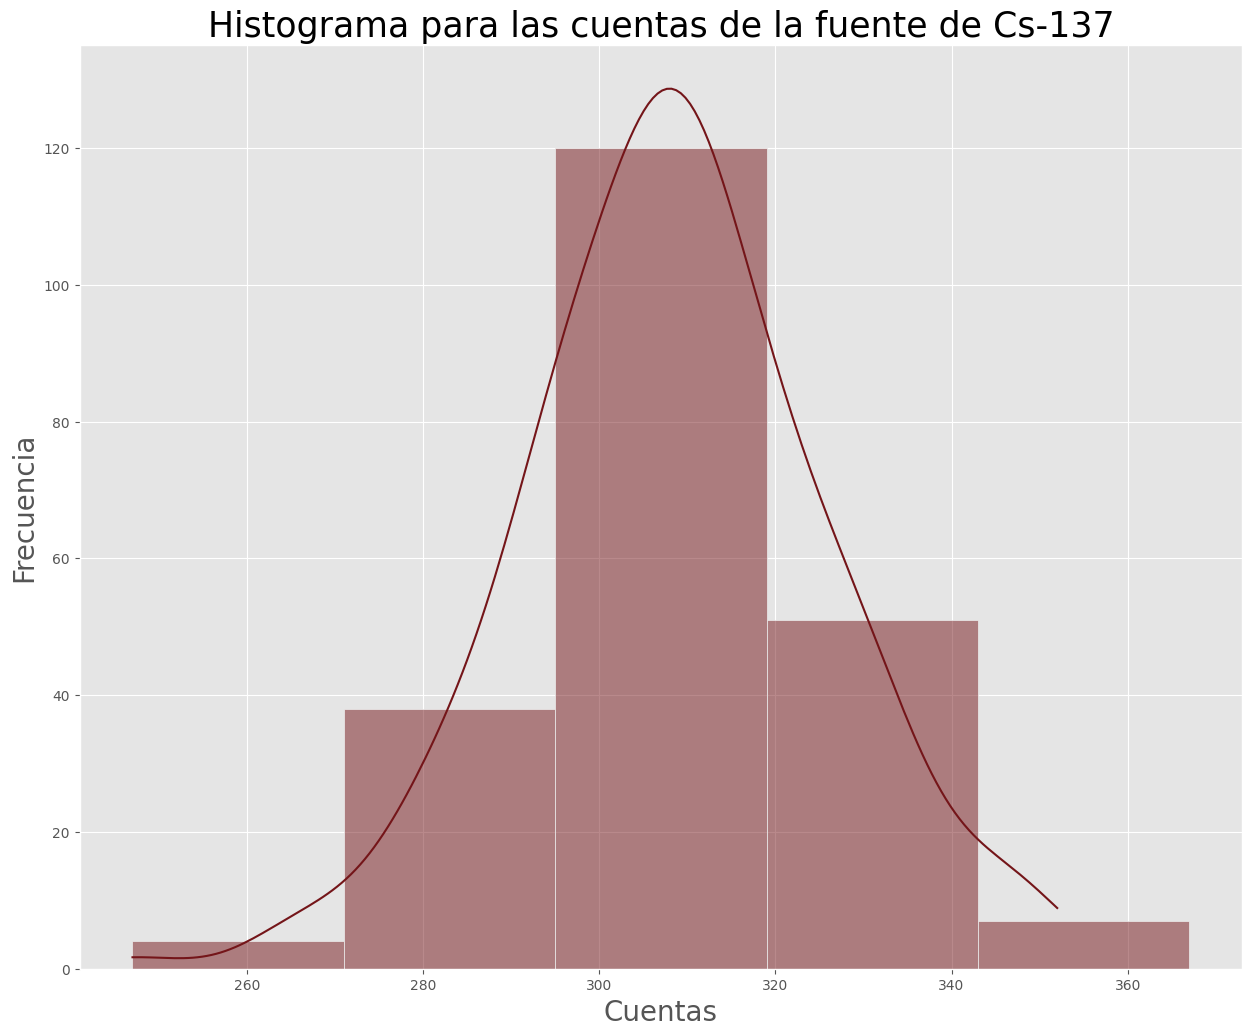

In [38]:
# Selecciona la columan de cuentas
cuentas = data_graf['Cuentas.1']
# Matplotlib se puede usar para crear la 'fig' como el lienzo donde graficar y el 'axes' que seria las (o las graficas) 
# De esta manera determinamos el tamaño de la imagen (figura) con el parámetro figsize 
fig, ax = plt.subplots(figsize=(15, 12))
# Ahora modificamos las propiedades de la grafica accediento a los metodos de el axes, el cual llame ax
# Con set_title ingresas el nombre de la gráfica y se puede modificar el tamaño, el color, etc
ax.set_title('Histograma para las cuentas de la fuente de Cs-137',fontsize=25)
# set_xlabel y set_ylabel sriven para dar el nombre a los ejes, tambien se puede modificar el tamaño de letra, color, etc
ax.set_xlabel('Cuentas',fontsize=20)
ax.set_ylabel('Frecuencia',fontsize=20)
# Aqui se manda a llamar a la libreria seaborn (sb) ya que cuenta con un metodo para graficar histogramas, 
# en este caso como parametro tiene 'cuentas' que son los datos, 'color' con el dato en codigo hex, 'binwidth' que es precisamente el ancho de clase 'h' que calcule arriba, 'ax' le dices que quieres que la graficas la 
# ponga en el axes que hiciste
sb.histplot(cuentas, color='#741519',binwidth=24,  kde=True, ax = ax,legend = True) #creamos el gráfico en Seaborn
plt.show()

## Estadísticos

A continuación la practica pide calcular los estadisticos básicos (promedio, varianza y desviación estandar), es por esto que utlice lalibreria pandas. Ya que al leer el archivo con esta, se genera un objeto (llamado dataframe) el ya tiene implementados métodos para analisar estadisticamente los datos.

En este caso solo bastará con mandar a llamar los métodos mean, var y std sobre data_graf estos métodos o funciones actuan sobre todos las columnas del dataframe, solo basta con que te centres en la columna de tu interes, que en este caso es la columna de "cuentas".

### Promedio (m)

In [39]:
m = data_graf.mean()
m

Lectura.1    110.500000
Cuentas.1    308.195455
dtype: float64

 ### Varianza ($s^2$)

In [40]:
var = data_graf.var()
var

Lectura.1    4051.666667
Cuentas.1     297.235596
dtype: float64

### Desviación estándar ($s$)

In [41]:
s = data_graf.std()
s

Lectura.1    63.652704
Cuentas.1    17.240522
dtype: float64

### Mediana (este no lo pide pero es un extra si te sirve)

In [42]:
data_graf.median()

Lectura.1    110.5
Cuentas.1    308.0
dtype: float64

Ahora la practica pide comparar el valor de la desviación estándar con la raiz cuadrada del valor promedio, lo hice yo de la siguiente manera

### Raíz cuadrada del valor promedio

In [43]:
m # Recuerda que m es el promedio, lo calculamos arriba
sm = np.sqrt(m)
sm

Lectura.1    10.511898
Cuentas.1    17.555496
dtype: float64

Desviación estándar = $17.240522$ 

Raíz cuadrada del valor promedio = $17.555496$

## Determinación del porcentaje de datos que caen dentro de $[-s,s]$, $[-2s,2s]$, $[-3s,3s]$

In [44]:

def porcentaje(s:float,m:float,total:float)->float:
    """
    Keyword arguments:
    s -- desviación estandar
    m -- promedio
    total -- Numero total de cuentas

    Return: per -- procentaje de cuentas que traen dentro del rango de desviación estándar deseado
    """
    
    # variable para crear un contador
    c = 0
    # cada que la cuenta caiga dentro del rango deseado, incrementa el contador
    for cuenta in cuentas:
        if cuenta >= m-s and cuenta <= m+s:
            c += 1
    # calcular el porncentaje
    per = c*100/total
    return per

In [45]:
# Seleccionamos los valores a analizar
# Recuerda que ya guardamos los datos de las cuentas en la variable "cuentas" para graficar
# podemos hacer uso de estas sin problema
s = cuentas.std()
m = cuentas.mean()
total = cuentas.count()


### Rango $[-s,s]$

In [46]:
porcentaje(s=s,m=m,total=total)

71.36363636363636

### Rango $[-2s,2s]$

In [47]:
porcentaje(s=2*s,m=m,total=total)

94.0909090909091

### Rango $[-3s,3s]$

In [48]:
porcentaje(s=3*s,m=m,total=total)

99.54545454545455

Tus datos parecen demasiado, estadares, casi no varian


## Ajuste de distribuciones

### Distribcion Binomial

La Distribución Binomial esta dada por la formula:
$$p(r;N,p)=\binom{N}{r}p^r(1−p)^{N−r}$$

En dónde $r$ con la condición $0\leq r \leq N$ y el parámetro $N$ $(N>0)$ son enteros; y el parámetro $p$ $(0≤p≤1$) es un número real. La Distribución Binomial describe la probabilidad de exactamente $r$ éxitos en $N$ pruebas si la probabilidad de éxito en una sola prueba es $p$.

In [49]:
p, n = stats.binom.fit(cuentas)

AttributeError: 'binom_gen' object has no attribute 'fit'

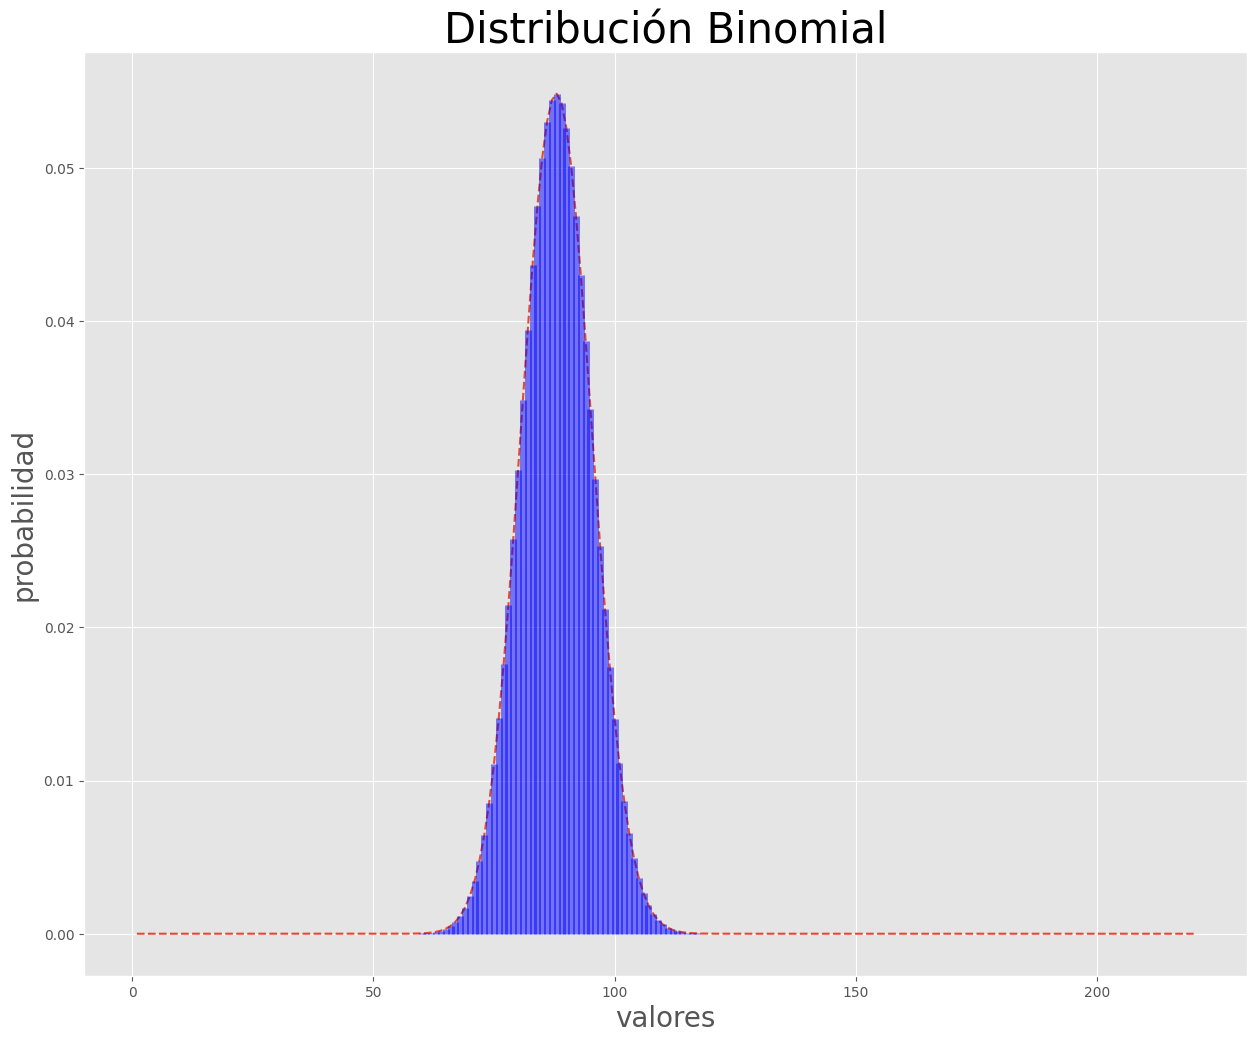

In [90]:

# Graficando Binomial
plt.figure(figsize=(15, 12))
N, p = total, 0.4 # parametros de forma 
binomial = stats.binom(N, p) # Distribución
x = data_graf['Lectura.1']
fmp = binomial.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Binomial',fontsize=30)
plt.ylabel('probabilidad',fontsize=20)
plt.xlabel('valores',fontsize=20)
plt.show()

### Distribucion Poisson

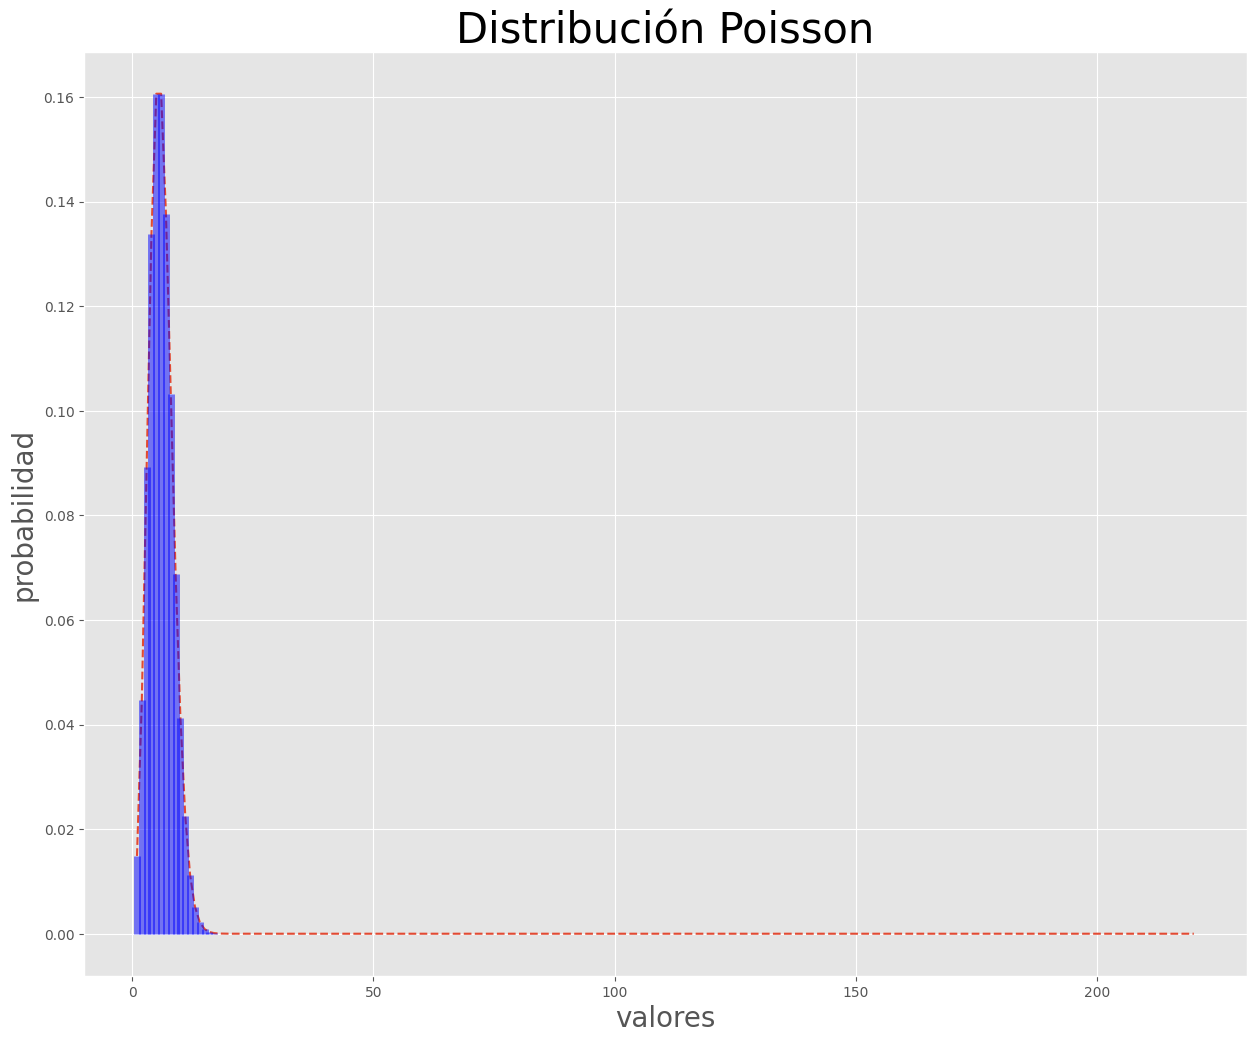

In [86]:
# Graficando Poisson
mu =  6 # parametro de forma 6 mediciones por minuto
poisson = stats.poisson(mu) # Distribución
x = data_graf['Lectura.1']
fmp = poisson.pmf(x) # Función de Masa de Probabilidad
plt.figure(figsize=(15, 12))
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Poisson',fontsize=30)
plt.ylabel('probabilidad',fontsize=20)
plt.xlabel('valores',fontsize=20)
plt.show()

### Distribución normal

La Distribución Normal, o también llamada Distribución de Gauss, es aplicable a un amplio rango de problemas, lo que la convierte en la distribución más utilizada en estadística; esta dada por la formula:
$$p(x;\mu,\sigma^2)=\frac{1}{\sigma \sqrt{2\pi}}e^{−\frac{1}{2}(\frac{x−\mu}{\sigma})^2}$$

En dónde $\mu$
es el parámetro de ubicación, y va a ser igual a la media aritmética y $\sigma^2$ es el desvío estándar. Algunos ejemplos de variables asociadas a fenómenos naturales que siguen 

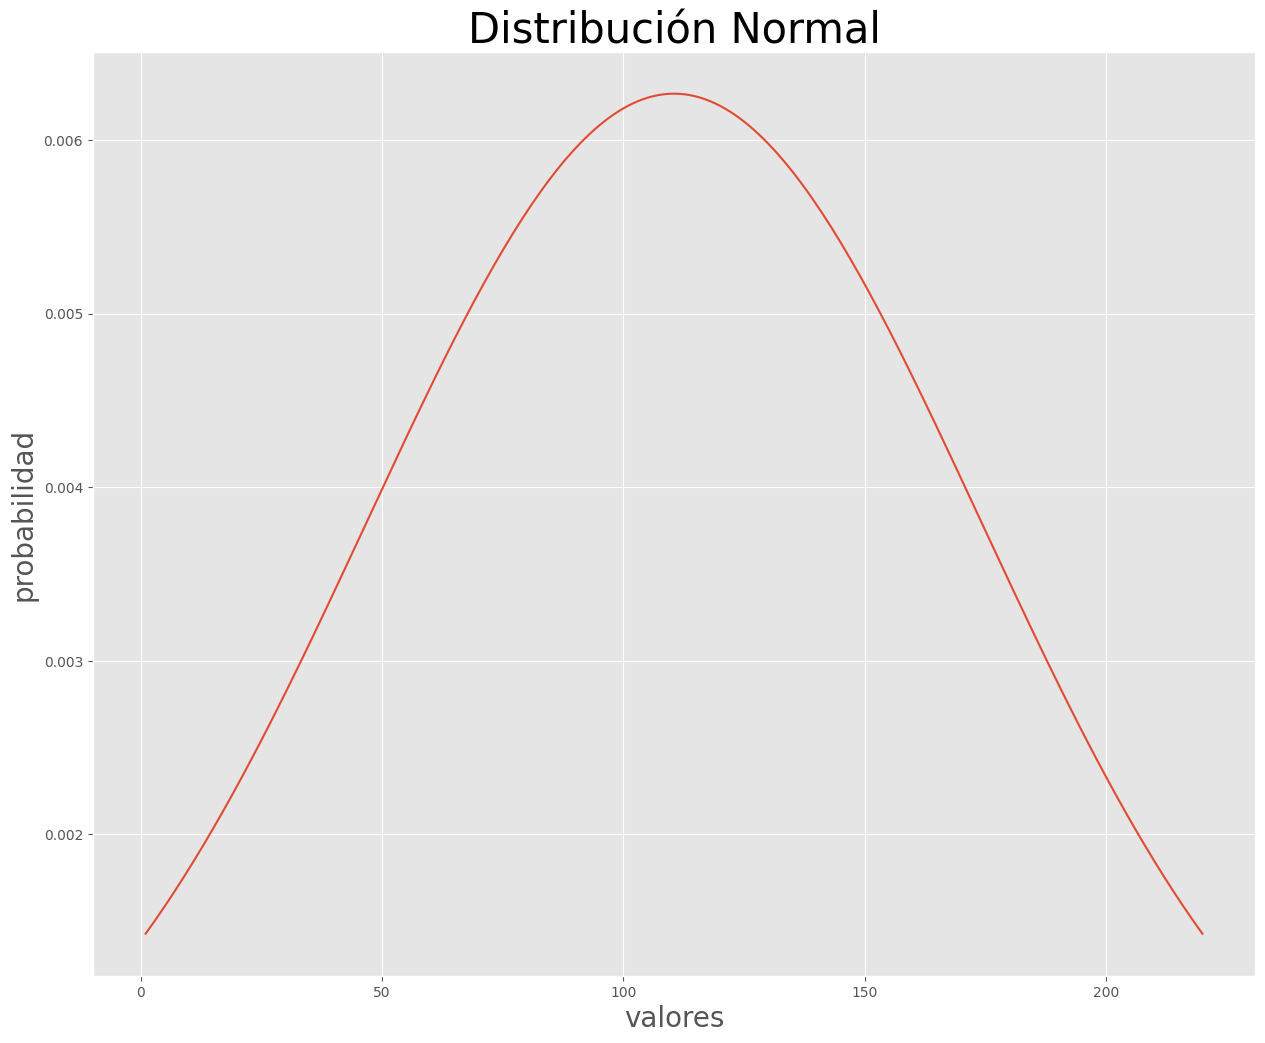

In [27]:
# Graficando Normal
mu, sigma = m, s # media y desvio estandar
normal = stats.norm(mu, sigma)
#x = np.linspace(normal.ppf(0.01),
 #               normal.ppf(0.99), 100)
x = data_graf['Lectura.1']
fp = normal.pdf(x) # Función de Probabilidad
plt.figure(figsize=(15, 12))
plt.plot(x, fp)
#plt.bar(x, np.histogram(cuentas, bins=x)[0]/len(cuentas), label='Datos')
plt.title('Distribución Normal',fontsize=30)
plt.ylabel('probabilidad',fontsize=20)
plt.xlabel('valores',fontsize=20)
plt.show()



0        1
1        2
2        3
3        4
4        5
      ... 
245    246
246    247
247    248
248    249
249    250
Name: Lectura.1, Length: 250, dtype: int64


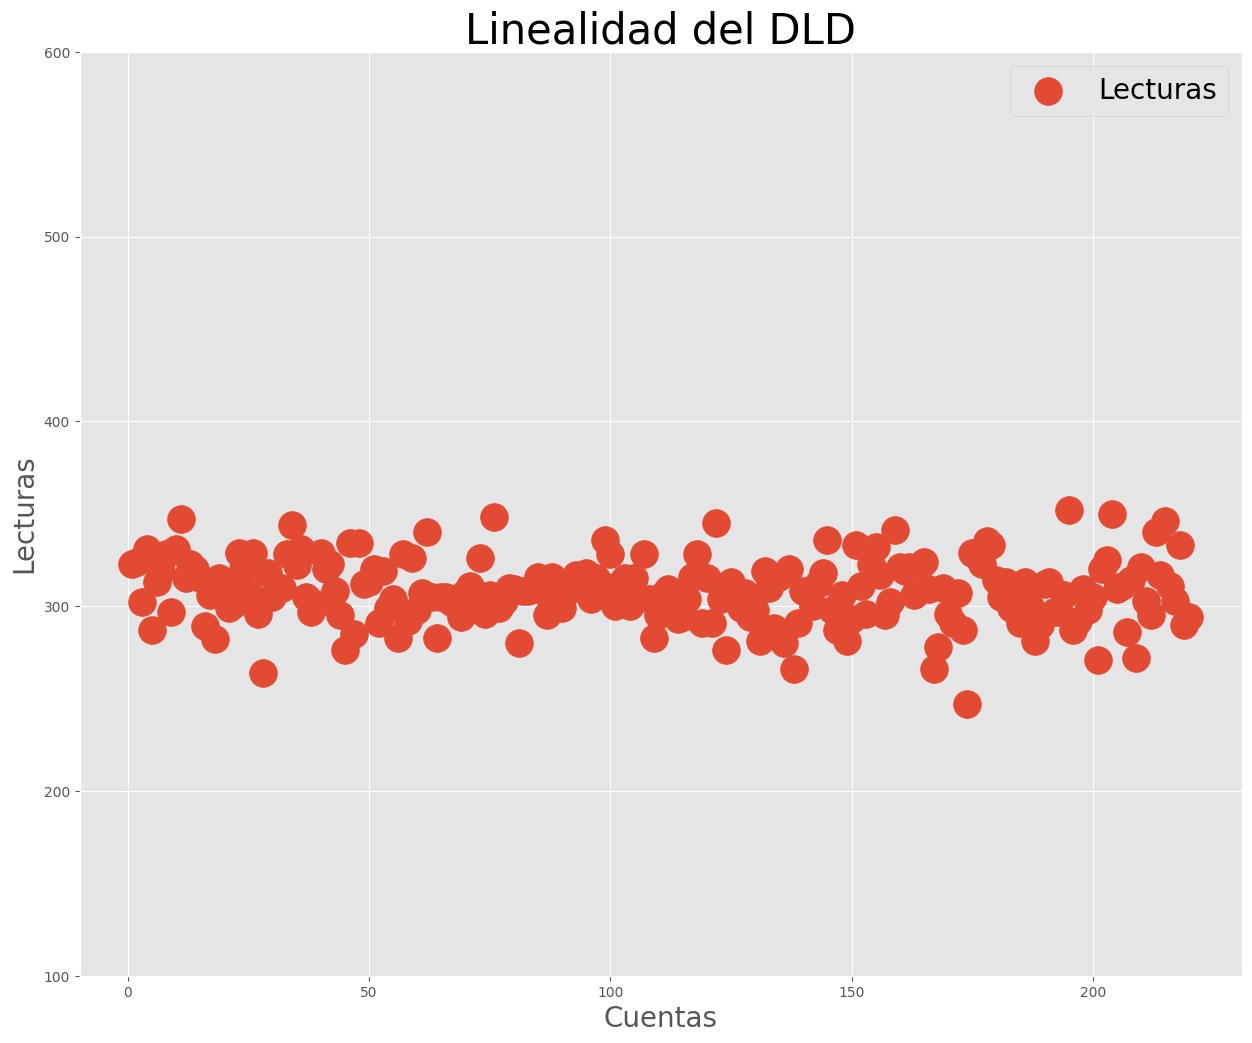

In [ ]:
plt.figure(figsize=(15, 12))
#promedio
X = data_graf['Lectura.1']
Y = data_graf.iloc[:,[1]]
print(X)
plt.scatter(X,Y, s = 400,label='Lecturas')
plt.legend(fontsize=20)
plt.xlabel('Cuentas',fontsize=20)
plt.ylabel('Lecturas',fontsize=20)
plt.title('Cuentas',fontsize=30)
plt.ylim(100,600)
plt.show()